In [5]:
using Percolation, PyPlot

# Square lattice nearest neighbor

## percolation

In [6]:
site = squarenn(100,0.6)

Percolation.squarenn(100,0.6,[0 1 … 1 0; 1 1 … 0 1; … ; 1 0 … 0 1; 0 1 … 1 1],[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0],Int64[],Tuple{Int64,Int64}[],Tuple{Int64,Float64}[],0.0,0.0,0)

In [7]:
percolation(site)

1

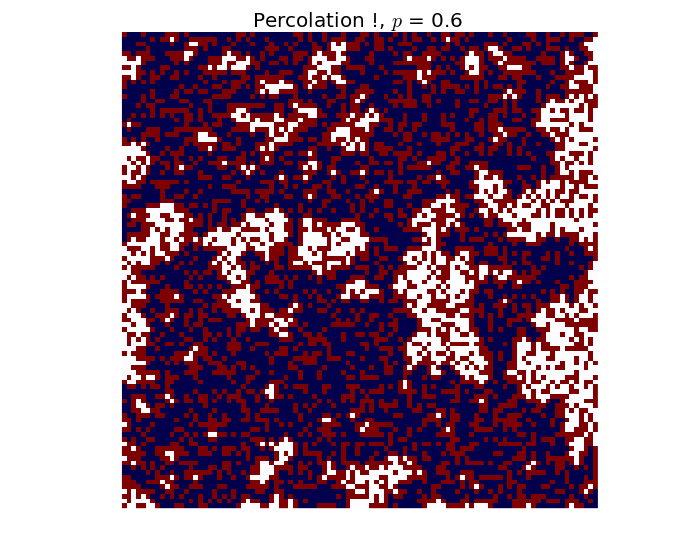

In [8]:
percolationplot(site)

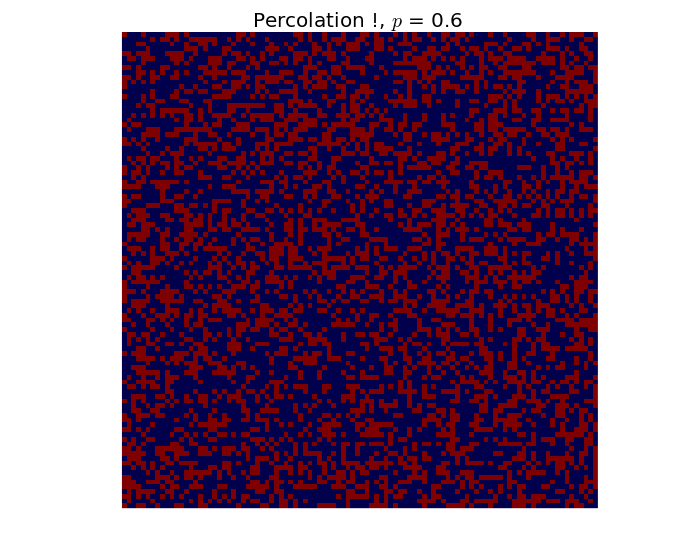

In [9]:
percolationplot(site, waterplot=false)

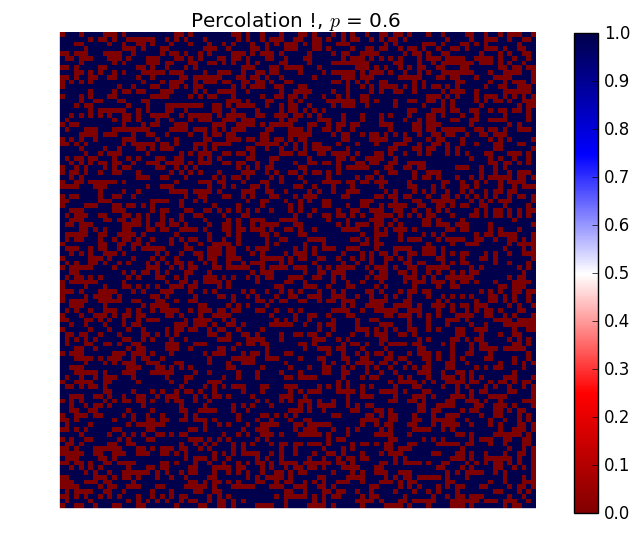

In [10]:
percolationplot(site, waterplot=false, colorbar=true)

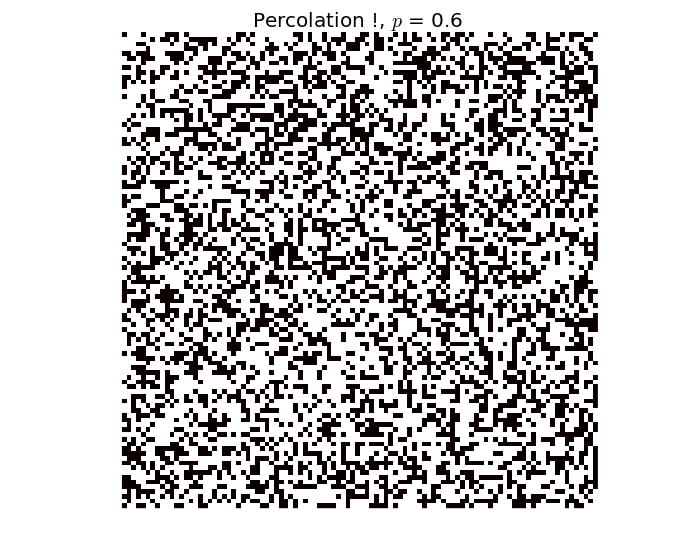

In [11]:
percolationplot(site, waterplot=false, color="hot")

# recursive, Square lattice nearest neighbor

In [12]:
site = squarennrec(100,0.6)

Percolation.squarennrec(100,0.6,[1 0 … 1 0; 1 1 … 1 1; … ; 1 1 … 0 1; 0 1 … 1 1],[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0],Int64[],Tuple{Int64,Int64}[],Tuple{Int64,Float64}[],0.0,0.0,0)

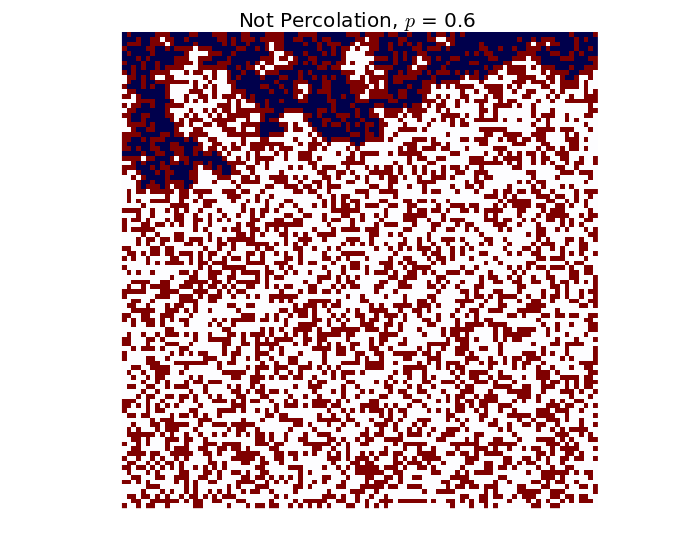

In [13]:
percolation(site)
percolationplot(site)

## cluster

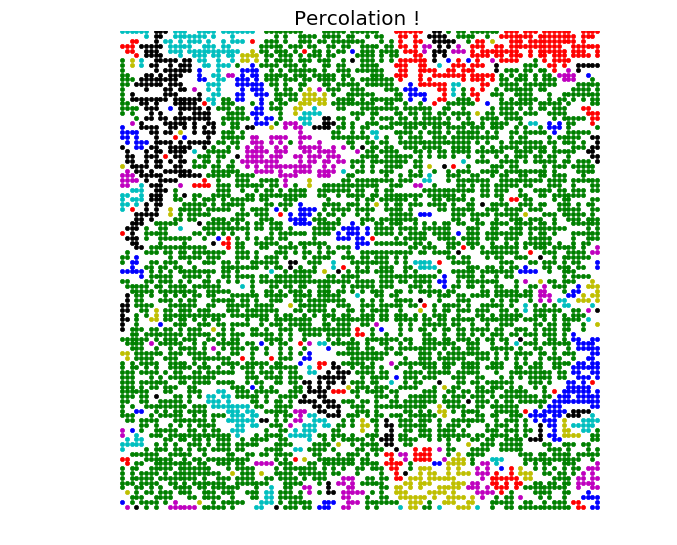

  0.291557 seconds (275.25 k allocations: 179.823 MB, 4.30% gc time)


In [14]:
site = squarenn(100,0.6)
@time cluster(site)
clusterplot(site)

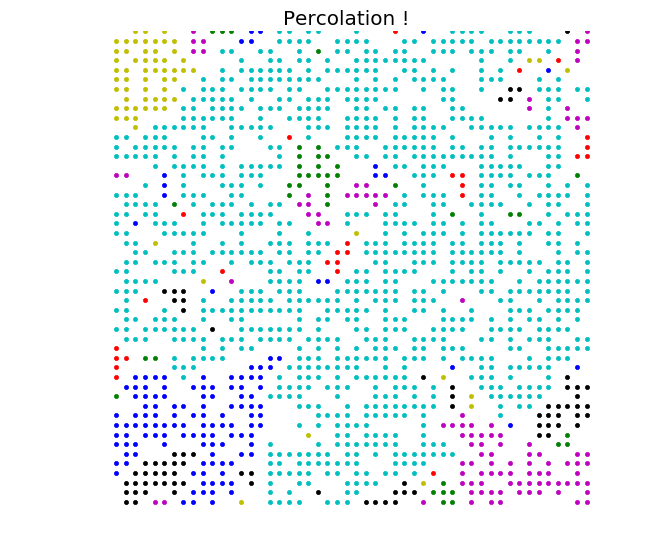

  0.139396 seconds (88.61 k allocations: 11.814 MB, 3.84% gc time)


In [15]:
site = squarennrec(50,0.6)
@time cluster(site)
clusterplot(site)

# Square lattice next nearest neighbor

next nearest neighborはクラスター未対応

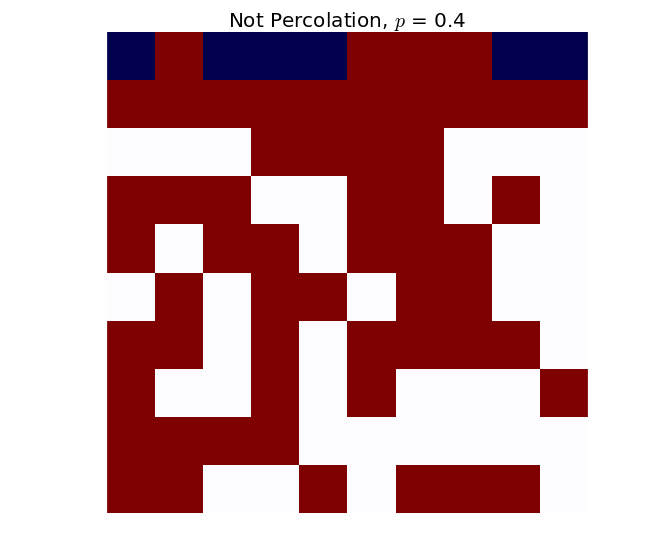

In [16]:
site = squarennn(10,0.4)
percolation(site)
percolationplot(site)

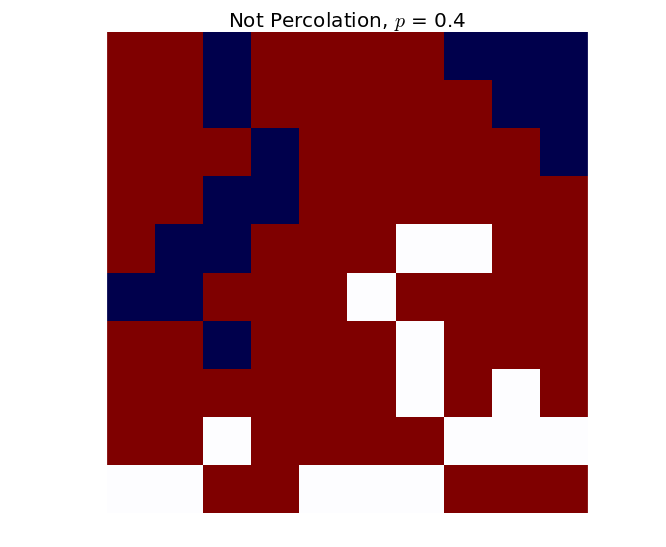

In [17]:
site = squarennnrec(10,0.4)
percolation(site)
percolationplot(site)

# Order parameter

## square nearest neighbor

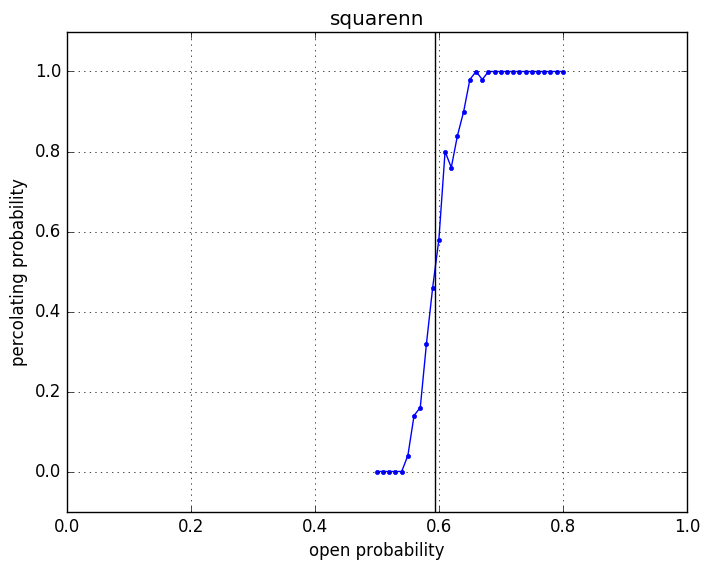

  0.373740 seconds (5.29 M allocations: 555.894 MB, 12.52% gc time)


In [18]:
plist = collect(0.5:0.01:0.8)
hit = zeros(Int64, length(plist))
N = 50; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarenn(N, plist[i])
        hit[i] += percolation(square)
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.593, 0.593], [-0.5, 1.1], "k")
grid("on")
title("squarenn")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

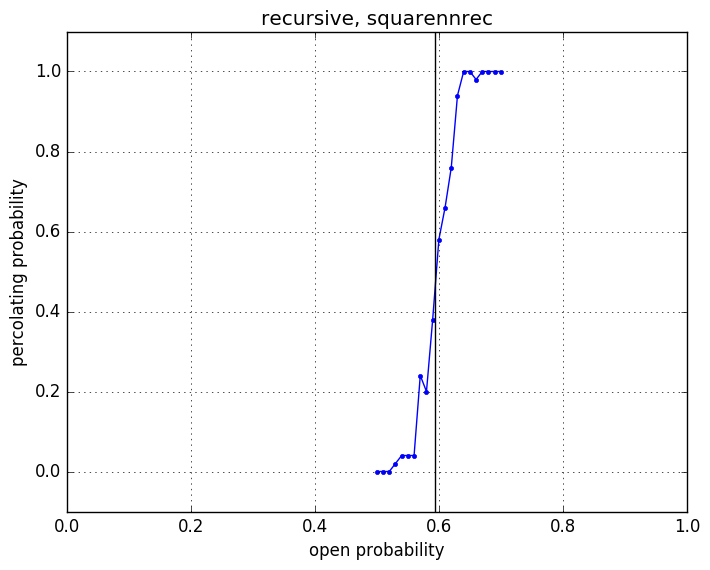

  0.060913 seconds (29.58 k allocations: 70.259 MB, 11.97% gc time)


In [19]:
# recursive, percolation
plist = collect(0.5:0.01:0.7)
hit = zeros(Int64, length(plist))
N = 50; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarennrec(N, plist[i])
        hit[i] += percolation(square)
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.593, 0.593], [-0.5, 1.1], "k")
grid("on")
title("recursive, squarennrec")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

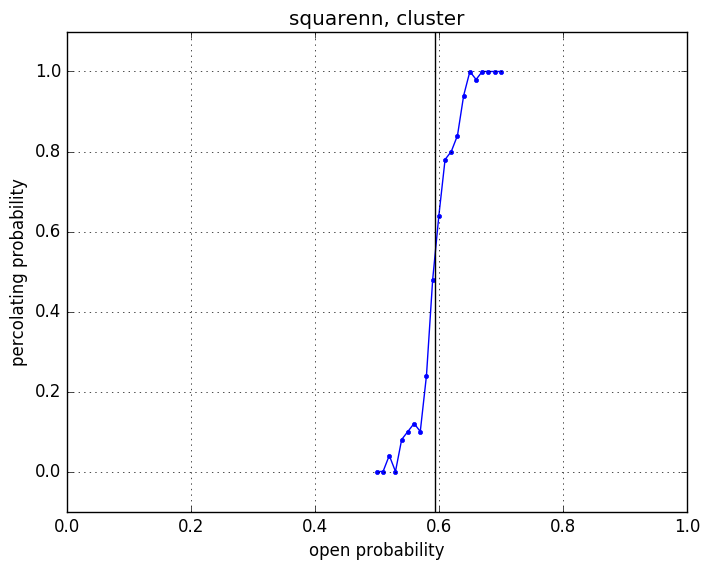

  5.002518 seconds (22.10 M allocations: 16.330 GB, 21.99% gc time)


In [20]:
# cluster
plist = collect(0.5:0.01:0.7)
hit = zeros(Int64, length(plist))
N = 50; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarenn(N, plist[i])
        cluster(square)
        hit[i] += square.PercolationOrNot
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.593, 0.593], [-0.5, 1.1], "k")
grid("on")
title("squarenn, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

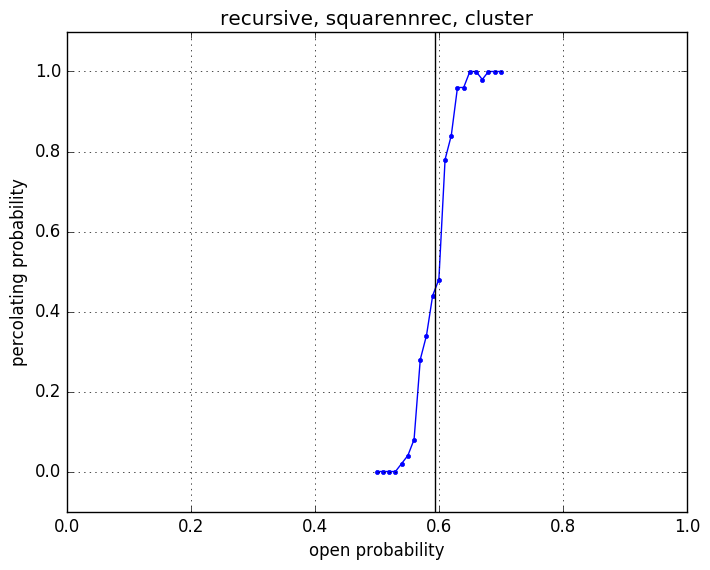

  2.040878 seconds (1.69 M allocations: 9.310 GB, 17.05% gc time)


In [21]:
# recursive, cluster
plist = collect(0.5:0.01:0.7)
hit = zeros(Int64, length(plist))
N = 50; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarennrec(N, plist[i])
        cluster(square)
        hit[i] += square.PercolationOrNot
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.593, 0.593], [-0.5, 1.1], "k")
grid("on")
title("recursive, squarennrec, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

## square next nearest neighbor

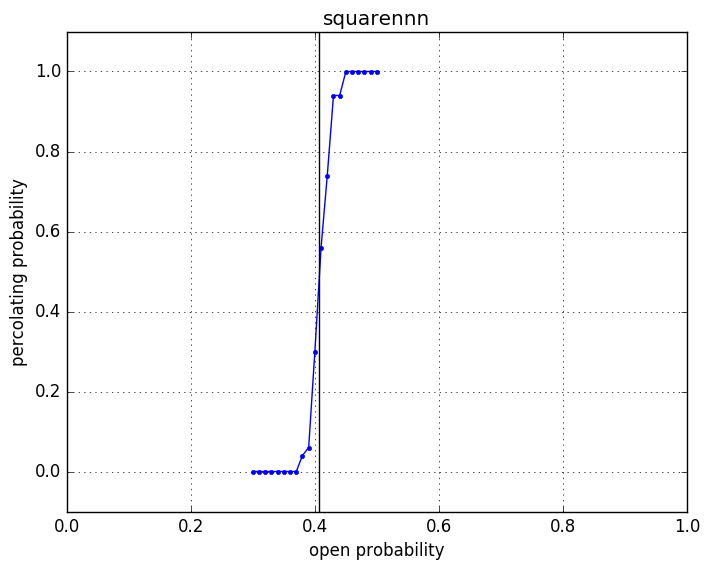

  0.649287 seconds (8.25 M allocations: 969.938 MB, 12.75% gc time)


In [22]:
# percolation
plist = collect(0.3:0.01:0.5)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarennn(N, plist[i])
        hit[i] += percolation(square)
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.407, 0.407], [-0.5, 1.1], "k")
grid("on")
title("squarennn")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

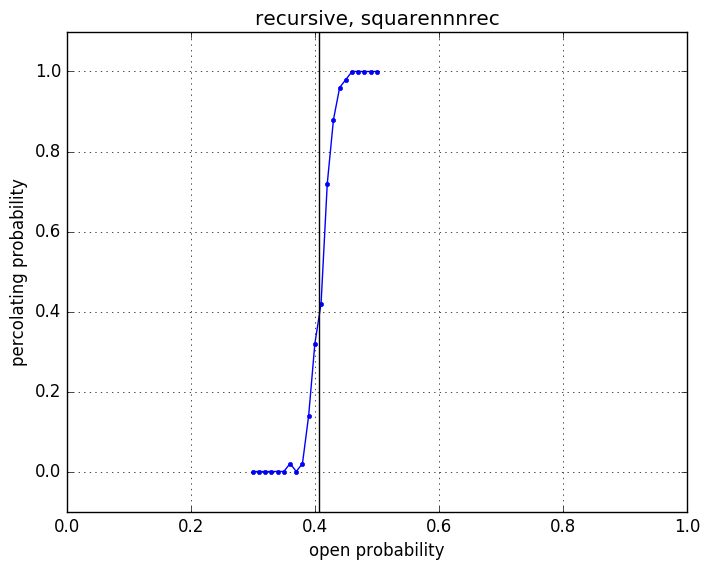

  0.208156 seconds (35.56 k allocations: 260.081 MB, 5.06% gc time)


In [23]:
# percolation
plist = collect(0.3:0.01:0.5)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarennnrec(N, plist[i])
        hit[i] += percolation(square)
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.407, 0.407], [-0.5, 1.1], "k")
grid("on")
title("recursive, squarennnrec")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

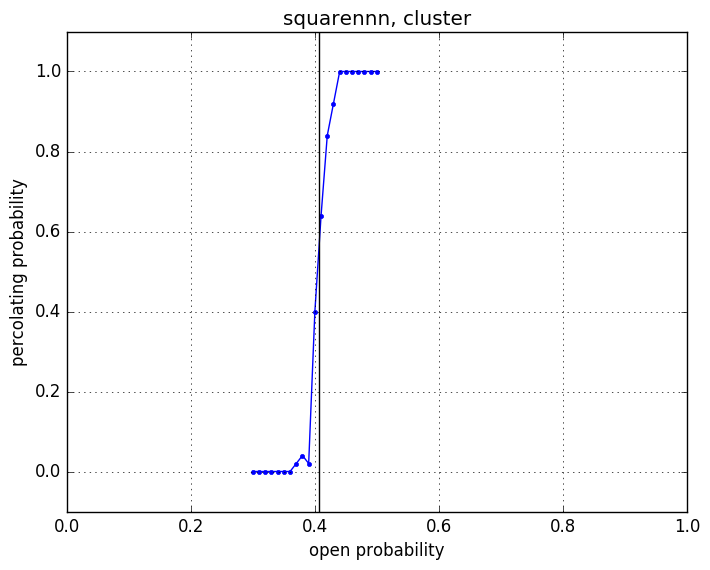

 44.612143 seconds (82.75 M allocations: 160.217 GB, 38.03% gc time)


In [24]:
# cluster
plist = collect(0.30:0.01:0.5)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarennn(N, plist[i])
        cluster(square)
        hit[i] += square.PercolationOrNot
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.407, 0.407], [-0.5, 1.1], "k")
grid("on")
title("squarennn, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

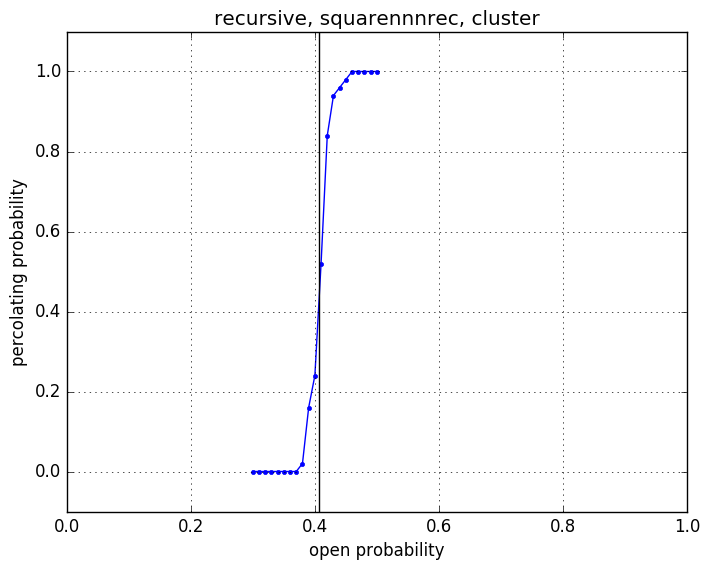

 16.662673 seconds (7.33 M allocations: 63.052 GB, 29.65% gc time)


In [25]:
# cluster
plist = collect(0.30:0.01:0.5)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarennnrec(N, plist[i])
        cluster(square)
        hit[i] += square.PercolationOrNot
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.407, 0.407], [-0.5, 1.1], "k")
grid("on")
title("recursive, squarennnrec, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);